In [6]:
import pandas as pd

In [5]:
df_train = pd.read_csv('train.csv')
df_train.head()

,acc_rate,track,m,n,current_pitch,current_roll,absoluate_roll,climb_delta,roll_rate_delta,climb_delta_diff,...,time8_delta,time9_delta,time10_delta,time11_delta,time12_delta,time13_delta,time14_delta,omega,set,target
0,-31,22,1.127497,0.03,1.44,-0.7,-9,6,0.011,-0.9,...,0.0,0.0,0.0,9.0,0.0,0.000,-10.0,0.336472,0.050,1.4
1,185,-40,1.363425,-0.10,0.30,-1.3,-12,16,0.022,0.1,...,0.0,0.0,0.0,9.0,0.0,0.000,-10.0,-0.693147,0.016,0.5
2,170,-17,0.794534,0.12,0.31,0.6,-6,9,-0.006,-2.5,...,0.0,0.0,0.0,9.0,0.0,0.001,-10.0,-0.916291,0.018,0.5
3,-399,-8,0.697676,-0.13,0.80,-0.7,-7,15,0.008,0.1,...,0.0,0.0,0.0,9.0,0.0,0.000,-10.0,-0.916291,0.015,0.2
4,-24,-18,1.127497,0.18,0.85,-1.8,-18,-3,0.019,-0.2,...,0.0,0.0,0.0,9.0,0.0,0.000,-10.0,-0.223144,0.030,1.5


In [6]:
# target
mean = df_train['target'].mean()
std = df_train['target'].std()
range_target = df_train['target'].max()-df_train['target'].min()
print("mean:",mean)
print("std:",std)
print("range:",range_target)

mean: 0.867212121212121
std: 0.4050357160037621
range: 3.5


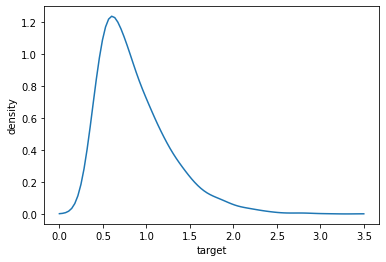

In [8]:
# kernel density estimate
from sklearn.neighbors import KernelDensity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

target = df_train['target'].values.reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=0.1)
kde.fit(target)

x = np.linspace(df_train['target'].min(), df_train['target'].max(), 100).reshape(-1, 1)
logtarget = kde.score_samples(x)
plt.plot(x[:, 0], np.exp(logtarget))
plt.xlabel('target')
plt.ylabel('density')
plt.show()

The values of target are mainly concentrated in the range of 0.5-1.0

In [9]:
# The features and how they relate to the target
df_mean = df_train.mean()
df_mean

acc_rate           -1.152606e+01
track              -1.267297e+01
m                   1.051280e+00
n                   6.038667e-02
current_pitch       6.293709e-01
current_roll        6.124848e-02
absoluate_roll     -1.100485e+01
climb_delta        -9.203636e-01
roll_rate_delta    -9.567273e-04
climb_delta_diff   -4.784242e-02
time1               2.187236e-02
time2               2.188558e-02
time3               2.188558e-02
time4               2.189782e-02
time5               2.189794e-02
time6               2.191770e-02
time7               2.191818e-02
time8               2.193745e-02
time9               2.193745e-02
time10              2.195418e-02
time11              4.390739e-02
time12              2.196885e-02
time13              2.196921e-02
time14              2.198194e-02
time1_delta        -1.320000e-04
time2_delta        -1.212121e-07
time3_delta        -6.266667e-05
time4_delta        -3.636364e-07
time5_delta        -8.072727e-05
time6_delta        -7.272727e-07
time7_delt

In [10]:
df_std = df_train.std()
df_std

acc_rate            259.637258
track                25.675733
m                     0.320703
n                     0.118805
current_pitch         0.313628
current_roll          0.967274
absoluate_roll        4.140399
climb_delta          10.334136
roll_rate_delta       0.013203
climb_delta_diff      1.132179
time1                 0.006873
time2                 0.006906
time3                 0.006906
time4                 0.006914
time5                 0.006914
time6                 0.006924
time7                 0.006925
time8                 0.006933
time9                 0.006933
time10                0.006939
time11                0.013876
time12                0.006953
time13                0.006954
time14                0.006960
time1_delta           0.000695
time2_delta           0.000011
time3_delta           0.000462
time4_delta           0.000025
time5_delta           0.000491
time6_delta           0.000049
time7_delta           0.000113
time8_delta           0.000011
time9_de

In [11]:
df_range = df_train.max()-df_train.min()
df_range

acc_rate            1921.000000
track                189.000000
m                      2.669835
n                      1.150000
current_pitch          3.000000
current_roll           5.900000
absoluate_roll        20.000000
climb_delta           90.000000
roll_rate_delta        0.136000
climb_delta_diff      17.500000
time1                  0.066000
time2                  0.066000
time3                  0.066000
time4                  0.066000
time5                  0.066000
time6                  0.066000
time7                  0.066000
time8                  0.064000
time9                  0.064000
time10                 0.062000
time11                 0.124000
time12                 0.062000
time13                 0.062000
time14                 0.061000
time1_delta            0.009000
time2_delta            0.001000
time3_delta            0.010000
time4_delta            0.002000
time5_delta            0.010000
time6_delta            0.004000
time7_delta            0.001600
time8_de

In [12]:
#correlation 
corr_target = df_train.corr()['target']
corr_target

acc_rate            0.079642
track              -0.061289
m                   0.334420
n                   0.396974
current_pitch       0.308080
current_roll        0.106015
absoluate_roll     -0.704515
climb_delta        -0.056970
roll_rate_delta    -0.052774
climb_delta_diff   -0.073560
time1               0.641312
time2               0.640405
time3               0.640405
time4               0.640398
time5               0.640413
time6               0.638817
time7               0.638829
time8               0.636374
time9               0.636374
time10              0.633567
time11              0.633707
time12              0.630812
time13              0.630761
time14              0.628335
time1_delta         0.035307
time2_delta        -0.009047
time3_delta         0.016617
time4_delta        -0.019433
time5_delta         0.010641
time6_delta        -0.019433
time7_delta         0.032115
time8_delta        -0.017202
time9_delta         0.040202
time10_delta       -0.002875
time11_delta  

In [13]:
corr_abs = df_train.corr().abs()
top3_features_corr = corr_abs.nlargest(4, ['target'])['target']
top3_features_corr

target            1.000000
absoluate_roll    0.704515
time1             0.641312
time5             0.640413
Name: target, dtype: float64

In [14]:
top3_features = top3_features_corr.index[1:]
top3_features

Index(['absoluate_roll', 'time1', 'time5'], dtype='object')

top3 features: absoluate_roll -0.704515, time1 0.641312, time5 0.640413

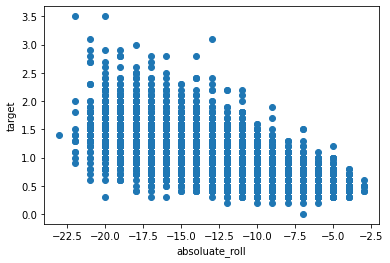

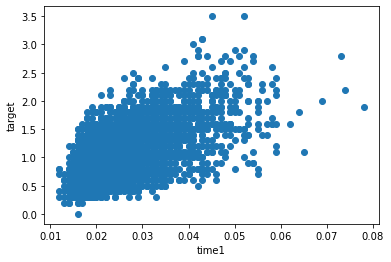

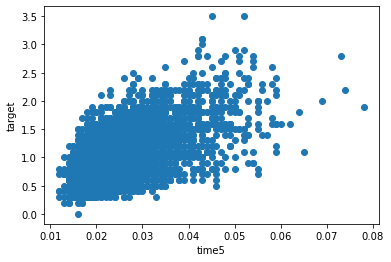

In [15]:
# scatter plot
for f in top3_features:
    plt.scatter(df_train[f], df_train['target'])
    plt.xlabel(f)
    plt.ylabel('target')
    plt.show()

In [16]:
# The relationships between features
heatmap = df_train.corr().style.background_gradient(cmap='coolwarm')

# Display the heatmap
heatmap

,acc_rate,track,m,n,current_pitch,current_roll,absoluate_roll,climb_delta,roll_rate_delta,climb_delta_diff,time1,time2,time3,time4,time5,time6,time7,time8,time9,time10,time11,time12,time13,time14,time1_delta,time2_delta,time3_delta,time4_delta,time5_delta,time6_delta,time7_delta,time8_delta,time9_delta,time10_delta,time11_delta,time12_delta,time13_delta,time14_delta,omega,set,target
acc_rate,1.000000,-0.008467,0.155929,0.099889,-0.789164,-0.133945,-0.043429,0.077362,0.154626,-0.341051,0.088944,0.074130,0.074130,0.067064,0.067050,0.059304,0.059243,0.047333,0.047333,0.032179,0.032066,0.014077,0.013903,-0.004301,0.200163,0.011004,0.151350,0.011616,0.155783,0.011616,0.209753,0.007484,0.231511,0.015785,0.269124,0.024040,0.274058,0.009429,-0.023902,-0.004345,0.079642
track,-0.008467,1.000000,0.056252,0.347037,0.004609,0.012356,0.075668,-0.458368,-0.069289,-0.007849,0.004875,0.011048,0.011048,0.014134,0.014125,0.015803,0.015779,0.016611,0.016611,0.017197,0.017200,0.016905,0.016890,0.016504,-0.085065,-0.003291,-0.060930,0.003640,-0.023667,0.003640,-0.003048,0.005715,0.000368,0.000861,0.020094,-0.000238,0.021057,0.011462,0.023334,0.016481,-0.061289
m,0.155929,0.056252,1.000000,0.137915,-0.112548,-0.034172,-0.052549,-0.095433,0.127867,-0.127871,0.038749,0.041675,0.041675,0.042506,0.042489,0.040307,0.040215,0.036067,0.036067,0.030842,0.030901,0.025034,0.024974,0.018657,-0.000689,0.023209,0.001650,0.019686,0.046176,0.019686,0.080429,0.010404,0.088888,-0.004812,0.101205,0.016218,0.108116,0.027488,0.022356,0.018593,0.334420
n,0.099889,0.347037,0.137915,1.000000,0.146059,0.039020,-0.395333,-0.766239,-0.203489,-0.443127,0.360342,0.375389,0.375389,0.382694,0.382723,0.389063,0.389151,0.397736,0.397736,0.407836,0.408024,0.415496,0.415628,0.420160,-0.196451,-0.018500,-0.143256,-0.028967,-0.131710,-0.028967,-0.146613,-0.023134,-0.149312,-0.016142,-0.126383,-0.030081,-0.067889,-0.013360,0.412854,0.420111,0.396974
current_pitch,-0.789164,0.004609,-0.112548,0.146059,1.000000,0.090862,-0.165691,-0.190116,-0.140952,0.237025,0.526786,0.540229,0.540229,0.546666,0.546682,0.554092,0.554151,0.565241,0.565241,0.579025,0.579152,0.595326,0.595524,0.611331,-0.191737,-0.033726,-0.139419,-0.029863,-0.163734,-0.029863,-0.195832,-0.016523,-0.214201,-0.004538,-0.257161,-0.046048,-0.247561,-0.057729,0.606788,0.611388,0.308080
current_roll,-0.133945,0.012356,-0.034172,0.039020,0.090862,1.000000,0.195973,-0.159219,-0.669410,0.032057,-0.040590,-0.036062,-0.036062,-0.033292,-0.033285,-0.030816,-0.030773,-0.027659,-0.027659,-0.024379,-0.024168,-0.021967,-0.021960,-0.019301,-0.052669,-0.012963,-0.052150,-0.009247,-0.047894,-0.009247,-0.059576,-0.003856,-0.045503,-0.025998,-0.026569,-0.002146,-0.033200,-0.008217,0.002704,-0.019278,0.106015
absoluate_roll,-0.043429,0.075668,-0.052549,-0.395333,-0.165691,0.195973,1.000000,-0.035678,-0.170911,0.011081,-0.363393,-0.359553,-0.359553,-0.358120,-0.358138,-0.357226,-0.357293,-0.356357,-0.356357,-0.356667,-0.356823,-0.356609,-0.356642,-0.357073,-0.074866,0.023922,-0.038438,0.024960,0.004934,0.024960,0.004948,0.015943,0.014867,0.012622,0.020640,0.016494,0.029279,0.011207,-0.368673,-0.357018,-0.704515
climb_delta,0.077362,-0.458368,-0.095433,-0.766239,-0.190116,-0.159219,-0.035678,1.000000,0.337635,0.037423,-0.150594,-0.170936,-0.170936,-0.180247,-0.180273,-0.188873,-0.188938,-0.200401,-0.200401,-0.213967,-0.214085,-0.226250,-0.226385,-0.237523,0.270737,0.002216,0.189783,0.017269,0.169062,0.017269,0.190124,0.018198,0.193864,0.011402,0.185057,0.023437,0.159301,0.002698,-0.270175,-0.237490,-0.056970
roll_rate_delta,0.154626,-0.069289,0.127867,-0.203489,-0.140952,-0.669410,-0.170911,0.337635,1.000000,-0.000428,0.000337,-0.006185,-0.006185,-0.009598,-0.009621,-0.014681,-0.014754,-0.022380,-0.022380,-0.029927,-0.029967,-0.036808,-0.036907,-0.042885,0.090064,0.001704,0.069646,0.014221,0.108991,0.014221,0.145336,0.015047,0.119454,0.005779,0.107556,0.014961,0.081223,-0.005729,-0.058116,-0.042861,-0.052774
climb_delta_diff,-0.341051,-0.007849,

Interpret the matrix to see which features are highly correlated to each other. 

In [17]:
#Select 1 feature and take the 3 features that are most correlated to your chosen feature. Plot a 4x4 matrix of scatter plots where each off-diagonal scatter plot is between the corresponding two distinct features and the diagonals are kernel density estimates for each corresponding feature. Interpret this matrix of scatter plots. 
climb_delta = df_train['climb_delta']
corr_abs = df_train.corr().abs()
top3_corr = corr_abs.nlargest(4, 'climb_delta')['climb_delta']
top3_corr

climb_delta        1.000000
n                  0.766239
track              0.458368
roll_rate_delta    0.337635
Name: climb_delta, dtype: float64

Unable to revert mtime: /Library/Fonts
Fontconfig warning: ignoring UTF-8: not a valid region tag


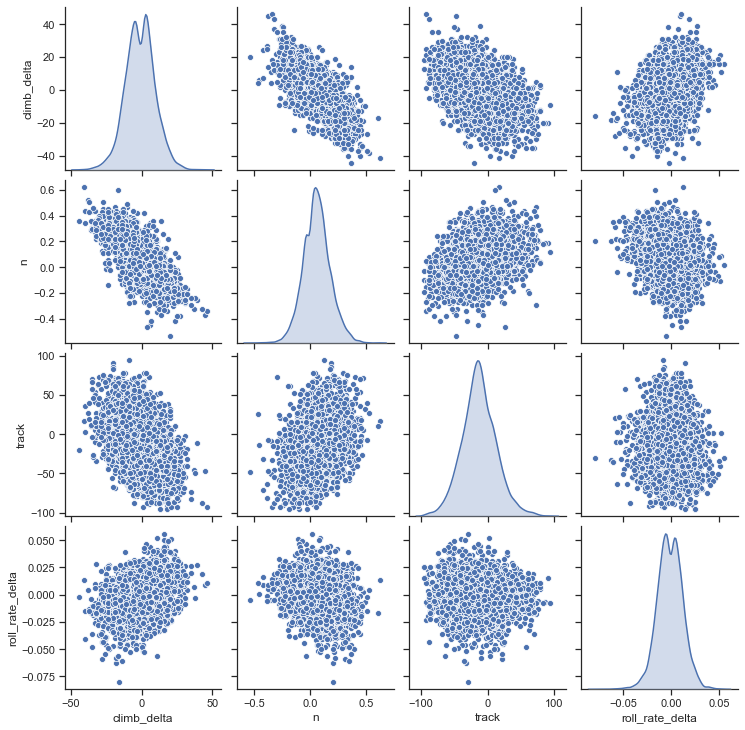

In [21]:
import seaborn as sns
top3_features_climb = top3_corr.index[1:]
top3_features_climb = df_train[top3_features_climb]

df_climb = pd.concat([climb_delta, top3_features_climb], axis=1)

# Create a 4x4 matrix of scatter plots
sns.set(style='ticks')
sns.pairplot(df_climb, diag_kind='kde', kind='scatter')

# Display
plt.show()

In [86]:
#baseline model
#linear regression, knn, random forest

In [7]:
#df_train = pd.read_csv('/Users/wangyu/Desktop/517/517final/train.csv')
X = df_train.iloc[:, :40]  # Features
y = df_train.iloc[:, 40]   # Target
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=517)

In [145]:
# Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Initialize cv,in-sample and out-of-sample errors
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=517)
in_sample_mse = np.zeros(k)
out_of_sample_mse = np.zeros(k)
in_sample_z_scores = np.array([])
out_of_sample_z_scores = np.array([])

for i, (train_index, test_index) in enumerate(kf.split(X)):
    model = LinearRegression()
    # Splitinng data into training and testing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Fitting the model on the training set
    model.fit(X_train, y_train)
    # Computing in-sample MSE
    y_pred_train = model.predict(X_train)
    in_sample_mse[i] = np.mean((y_train - y_pred_train)**2)
    # Computing out-of-sample MSE
    y_pred_test = model.predict(X_test)
    out_of_sample_mse[i] = np.mean((y_test - y_pred_test)**2)
    # Computing z-scores of errors
    in_sample_z_scores = np.concatenate((in_sample_z_scores, (y_train - y_pred_train) / np.std(y_train - y_pred_train)))
    out_of_sample_z_scores = np.concatenate((out_of_sample_z_scores, (y_test - y_pred_test) / np.std(y_test - y_pred_test)))

#  (mse=sum(mse)/10)
print(f"In-sample MSE: {np.sum(in_sample_mse)/10}")
print(f"Out-of-sample MSE: {np.sum(out_of_sample_mse)/10}")

In-sample MSE: 0.029564204643284676
Out-of-sample MSE: 0.03017786706300265


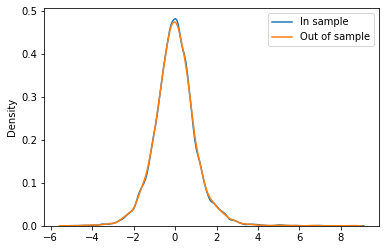

In [146]:
# Plot kernel density estimate of z-scores of errors(using sns)
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(in_sample_z_scores, label='In sample')
sns.kdeplot(out_of_sample_z_scores, label='Out of sample')
plt.legend()
plt.show()

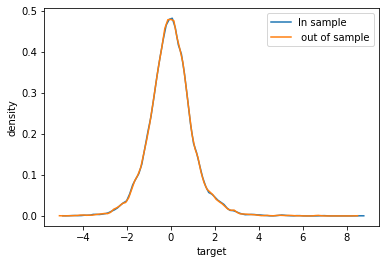

In [147]:
# Plot kernel density estimate of z-scores of errors(using the method in data exploration part)
kde = KernelDensity(kernel='gaussian', bandwidth=0.1)
kde.fit(in_sample_z_scores.reshape(-1, 1))

x1 = np.linspace(in_sample_z_scores.min(),in_sample_z_scores.max(), 100).reshape(-1, 1)
logtarget1 = kde.score_samples(x1)
plt.plot(x1[:, 0], np.exp(logtarget1), label= 'In sample')

kde.fit(out_of_sample_z_scores.reshape(-1, 1))
x2 = np.linspace(out_of_sample_z_scores.min(),out_of_sample_z_scores.max(), 100).reshape(-1, 1)
logtarget2 = kde.score_samples(x2)
plt.plot(x2[:, 0], np.exp(logtarget2),label =' out of sample')

plt.legend(loc='upper right')
plt.xlabel('target')
plt.ylabel('density')
plt.show()

In [148]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

# Initialize knn regressor and cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=517)
in_sample_mse_knn = np.zeros(k)
out_of_sample_mse_knn = np.zeros(k)
in_sample_z_scores_knn = np.array([])
out_of_sample_z_scores_knn = np.array([])

for i, (train_index, test_index) in enumerate(kf.split(X)):
    model = KNeighborsRegressor(n_neighbors=5)
    # Spliting data into training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Fiting the model on the training set
    model.fit(X_train, y_train)
    # Computing in-sample MSE
    y_pred_train = model.predict(X_train)
    in_sample_mse_knn[i] = np.mean((y_train - y_pred_train)**2)
    # Computing out-of-sample MSE
    y_pred_test = model.predict(X_test)
    out_of_sample_mse_knn[i] = np.mean((y_test - y_pred_test)**2)
    # Computing z-scores of errors
    in_sample_z_scores_knn = np.concatenate((in_sample_z_scores_knn, (y_train - y_pred_train) / np.std(y_train - y_pred_train)))
    out_of_sample_z_scores_knn = np.concatenate((out_of_sample_z_scores_knn, (y_test - y_pred_test) / np.std(y_test - y_pred_test)))


In [149]:
# (mse=sum(mse)/10)
print(f"In-sample MSE: {np.sum(in_sample_mse_knn)/10}")
print(f"Out-of-sample MSE: {np.sum(out_of_sample_mse_knn)/10}")

In-sample MSE: 0.08284349629629773
Out-of-sample MSE: 0.12735898181818178


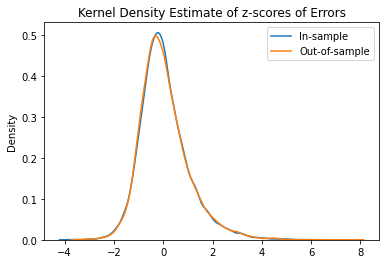

In [150]:
# Plot kernel density estimate of z-scores of errors
sns.kdeplot(in_sample_z_scores_knn, label='In-sample')
sns.kdeplot(out_of_sample_z_scores_knn, label='Out-of-sample')
plt.legend()
plt.title("Kernel Density Estimate of z-scores of Errors")
plt.show()

In [151]:
# random forest
from sklearn.ensemble import RandomForestRegressor
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=517)
in_sample_mse_rf = np.zeros(k)
out_of_sample_mse_rf = np.zeros(k)


in_sample_z_scores_rf = np.array([])
out_of_sample_z_scores_rf = np.array([])

for train_index, test_index in kf.split(X):
    model = RandomForestRegressor(n_estimators=100, random_state=517)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Fit the model  
    model.fit(X_train, y_train)
    # Compute in-sample MSE
    y_pred_train = model.predict(X_train)
    in_sample_mse_rf[i] = np.mean((y_train - y_pred_train)**2)
    # Compute out-of-sample MSE
    y_pred_test = model.predict(X_test)
    out_of_sample_mse_rf[i] = np.mean((y_test - y_pred_test)**2)
    # Compute z-scores of errors
    in_sample_z_scores_rf = np.concatenate((in_sample_z_scores_rf, (y_train - y_pred_train) / np.std(y_train - y_pred_train)))
    out_of_sample_z_scores_rf = np.concatenate((out_of_sample_z_scores_rf, (y_test - y_pred_test) / np.std(y_test - y_pred_test)))


# (mse=sum(mse)/10)
print(f"In-sample MSE: {np.sum(in_sample_mse_rf)/10}")
print(f"Out-of-sample MSE: {np.sum(out_of_sample_mse_rf)/10}")

In-sample MSE: 0.00037806420202020336
Out-of-sample MSE: 0.0024899340606060593


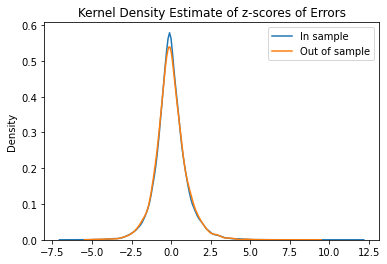

In [152]:
# Plot kernel density estimate of z-scores of errors
sns.kdeplot(in_sample_z_scores_rf, label='In sample')
sns.kdeplot(out_of_sample_z_scores_rf, label='Out of sample')
plt.legend()
plt.title("Kernel Density Estimate of z-scores of Errors")
plt.show()

In [153]:
in_sample_mse
#out_of_sample_mse

array([0.02984364, 0.02990497, 0.02966893, 0.02921515, 0.02932226,
       0.02960158, 0.02946189, 0.02964849, 0.02921139, 0.02976374])

In [154]:
# a paired t-test between linear regression and knn(in sample)

t, p = ttest_rel(in_sample_mse, in_sample_mse_knn)
print("t-value:", t)
print("p-value:", p)

t-value: -256.1085201005754
p-value: 1.0735217007824255e-18


In [155]:
# a paired t-test between linear regression and knn(out of sample)

t, p = ttest_rel(out_of_sample_mse, out_of_sample_mse_knn)
print("t-value:", t)
print("p-value:", p)


t-value: -40.41259853501299
p-value: 1.7316322272982124e-11


In [156]:
# a paired t-test between linear regression and random forest(in sample)

t, p = ttest_rel(in_sample_mse, in_sample_mse_rf)
print("t-value:", t)
print("p-value:", p)

t-value: 80.18375667563492
p-value: 3.6949448625998345e-14


In [157]:
# a paired t-test between linear regression and random forest(out of sample)

t, p = ttest_rel(out_of_sample_mse, out_of_sample_mse_rf)
print("t-value:", t)
print("p-value:", p)


t-value: 9.90776431213586
p-value: 3.864940749048801e-06


In [158]:
# a paired t-test between knn regression and random forest(in sample)

t, p = ttest_rel(in_sample_mse_knn, in_sample_mse_rf)
print("t-value:", t)
print("p-value:", p)

t-value: 209.02660841570244
p-value: 6.6786815302998e-18


In [159]:
# a paired t-test between knn and random forest(out of sample)

t, p = ttest_rel(out_of_sample_mse_knn, out_of_sample_mse_rf)
print("t-value:", t)
print("p-value:", p)


t-value: 29.164427934393913
p-value: 3.195124916575802e-10


In [8]:
#Baseline Models 2
X = df_train.drop('target',axis=1).values
y = df_train['target'].values

In [9]:
# k fold
# we use Gaussian Process, Neural Network and Adaptive or Gradient Boosting Regressor
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

clf_GPR = GaussianProcessRegressor(random_state=0)
clf_MLP = MLPRegressor(random_state=1, max_iter=100)
clf_GBR = GradientBoostingRegressor(random_state=0)

models = [('GPR', clf_GPR), ('MLP', clf_MLP), ('GBR', clf_GBR)]

# Perform k-fold cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True)

in_sample_scores = {}
out_sample_scores = {}

for name, model in models:
    in_sample_errors = []
    out_sample_errors = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        in_sample_error = mean_squared_error(y_train, y_train_pred)
        out_sample_error = mean_squared_error(y_test, y_test_pred)
        
        in_sample_errors.append(in_sample_error)
        out_sample_errors.append(out_sample_error)
    
    in_sample_scores[name] = in_sample_errors
    out_sample_scores[name] = out_sample_errors

/Users/wangyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangyu/opt/an

In [11]:
for name, errors in in_sample_scores.items():
    print(name,np.mean(errors))

GPR 9.119208435104842e-21
MLP 0.045954432485550555
GBR 0.021292015355083967


In [12]:
for name, errors in out_sample_scores.items():
    print(name,np.mean(errors))

GPR 0.9114031887651896
MLP 0.04866780659538938
GBR 0.025933044683391332


In [13]:
# Compute z-scores of errors
from scipy import stats

z_scores = {}
for name, errors in out_sample_scores.items():
    z_scores[name] = stats.zscore(errors)

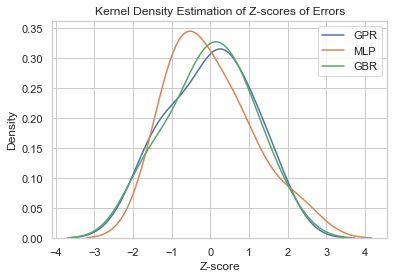

In [15]:
# Kernel density estimation
import seaborn as sns
sns.set(style="whitegrid")
for name, z in z_scores.items():
    sns.kdeplot(z, label=name)
plt.legend()
plt.xlabel("Z-score")
plt.ylabel("Density")
plt.title("Kernel Density Estimation of Z-scores of Errors")
plt.show()

In [16]:
# Paired t-test for in-sample errors
in_sample_p_values = {}
for i, (name1, model1) in enumerate(models[:-1]):
    for name2, model2 in models[i + 1:]:
        t_stat, p_value = stats.ttest_rel(in_sample_scores[name1], in_sample_scores[name2])
        in_sample_p_values[(name1, name2)] = p_value

print("In-sample paired t-test p-values:", in_sample_p_values)

In-sample paired t-test p-values: {('GPR', 'MLP'): 1.8718930875304094e-11, ('GPR', 'GBR'): 8.207095292186985e-23, ('MLP', 'GBR'): 4.502231287319796e-09}


In [17]:
# Paired t-test for out-sample errors
out_sample_p_values = {}
for i, (name1, model1) in enumerate(models[:-1]):
    for name2, model2 in models[i + 1:]:
        t_stat, p_value = stats.ttest_rel(out_sample_scores[name1], out_sample_scores[name2])
        out_sample_p_values[(name1, name2)] = p_value

print("Out-sample paired t-test p-values:", out_sample_p_values)

Out-sample paired t-test p-values: {('GPR', 'MLP'): 5.6118707488747197e-14, ('GPR', 'GBR'): 4.6883272444928957e-14, ('MLP', 'GBR'): 1.1063160143162985e-07}
